<a href="https://colab.research.google.com/github/ychencq/ECE-232E/blob/master/Project1/Q1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(igraph)
library(ggplot2)



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# a)

[1] 100

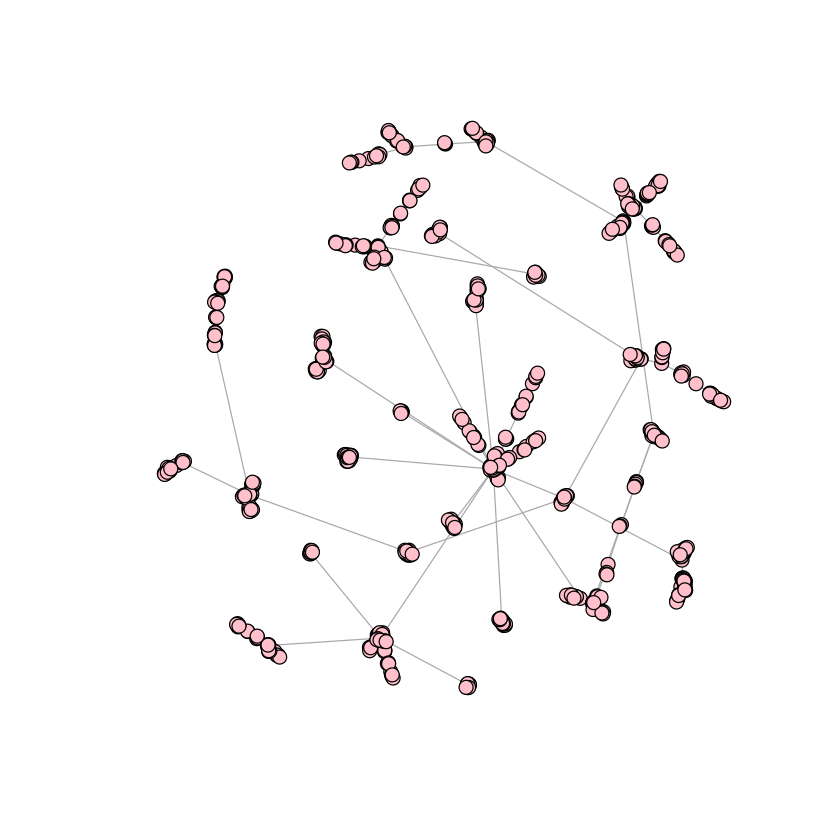

In [4]:
records <- 0
for (i in 1:100) {
  gra <- barabasi.game(1000, m=1, directed=F)
  if (is.connected(gra)) {
    records <- records + 1
  }
}
plot(gra, vertex.color="pink", edge.arrow.size=1,  vertex.size=5, vertex.label="" ,vertex.frame.color="black") 
records

We tried 100 times and all of them are connected

# b)

[1] 0.9310146

IGRAPH clustering fast greedy, groups: 36, mod: 0.93
+ groups:
  $`1`
   [1]   6  16  55  97 107 109 112 114 129 137 146 199 247 271 276 282 318 351
  [19] 370 381 385 415 462 481 489 504 543 576 590 592 640 690 725 732 747 752
  [37] 771 785 807 828 866 885 909 920 941 947 974
  
  $`2`
   [1]   45   50   52   89  100  149  159  236  267  286  300  331  336  337
  [15]  362  390  418  466  482  528  530  550  556  557  661  663  671  672
  [29]  675  681  697  710  731  758  776  792  810  822  834  850  882  922
  [43]  967 1000
  + ... omitted several groups/vertices


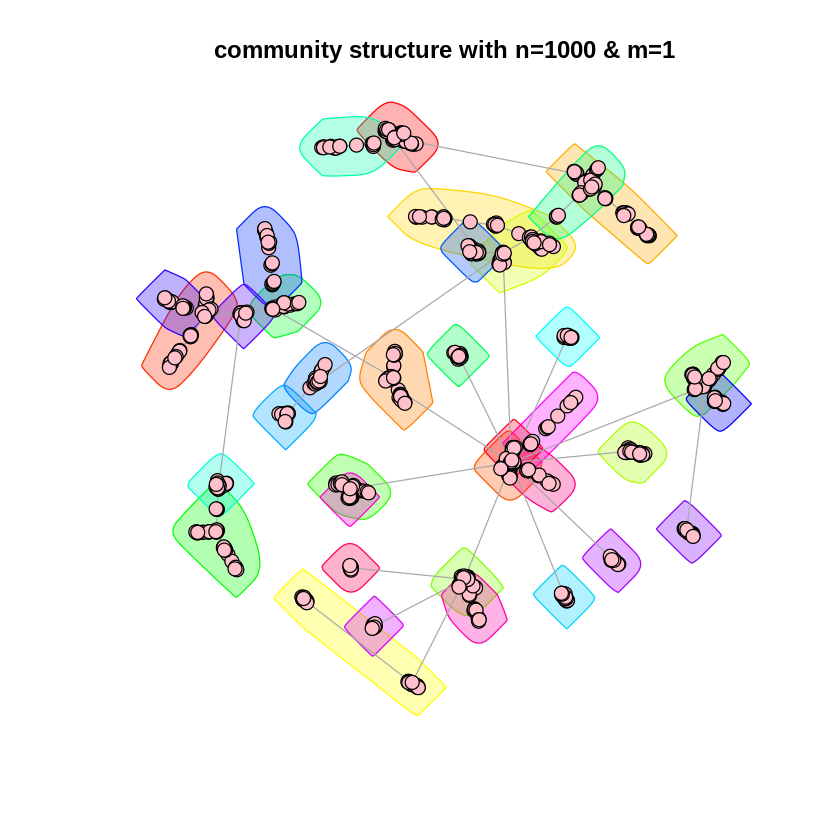

In [6]:
com_struc <- cluster_fast_greedy(gra)
modularity(com_struc)
print(com_struc)
plot(gra, mark.groups=groups(com_struc), edge.arrow.size=1, 
     vertex.color="pink", vertex.size=5, vertex.label="", vertex.frame.color="black",  
     main="community structure with n=1000 & m=1")


# c)

[1] 0.9775897

IGRAPH clustering fast greedy, groups: 111, mod: 0.98
+ groups:
  $`1`
    [1]    5   44  114  116  169  283  310  427  469  473  503  543  544  594
   [15]  708  832  963 1000 1077 1086 1092 1094 1195 1269 1339 1385 1398 1432
   [29] 1536 1547 1548 1557 1593 1628 1693 1768 1878 1972 2013 2072 2130 2132
   [43] 2223 2312 2364 2519 2555 2595 2599 2724 2746 2832 2836 2882 2896 2914
   [57] 2993 3017 3060 3080 3164 3185 3206 3270 3318 3337 3400 3411 3477 3579
   [71] 3655 3717 3798 3848 3910 4023 4066 4103 4132 4140 4181 4202 4253 4301
   [85] 4313 4378 4429 4438 4446 4472 4543 4563 4648 4670 4701 4707 4712 4808
   [99] 4857 4933 4956 4971 5011 5017 5080 5100 5103 5109 5142 5188 5226 5302
  [113] 5430 5435 5462 5474 5492 5505 5530 5544 5578 5603 5646 5652 5665 5718
  + ... omitted several groups/vertices


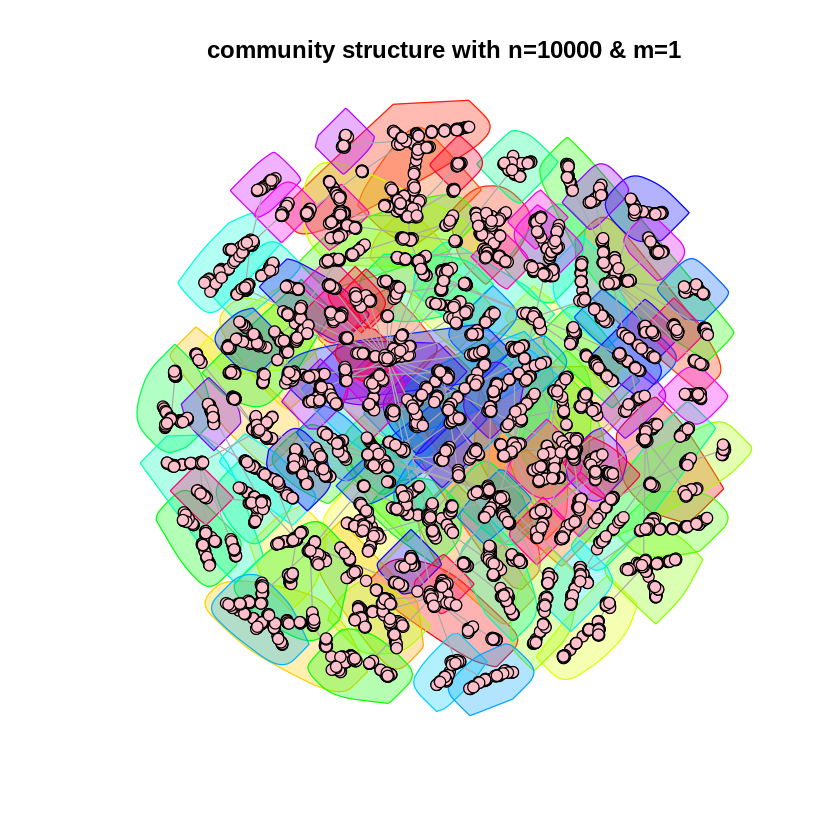

In [8]:
gra2 <- barabasi.game(10000, m=1, directed=F)
# plot(gra2, vertex.color="pink",edge.arrow.size=1,  vertex.size=4, vertex.label="", vertex.frame.color="black") 

com_struc2 <- cluster_fast_greedy(gra2)
modularity(com_struc2)
print(com_struc2)
plot(gra2, vertex.color="pink", mark.groups=groups(com_struc2), edge.arrow.size=1, 
     vertex.size=4, vertex.label="", vertex.frame.color="black",  
     main="community structure with n=10000 & m=1")

With higher number of nodes, we found that the modularity increased, which means that the relations between the members of every community were intensified and the relation among the communities were weaken.

# d)


Call:
lm(formula = log_distribution ~ degree)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27473 -0.37782  0.01889  0.34785  1.37953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0071     0.4907   2.052   0.0569 .  
degree       -2.7066     0.2118 -12.780 8.22e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6085 on 16 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.9108,	Adjusted R-squared:  0.9052 
F-statistic: 163.3 on 1 and 16 DF,  p-value: 8.219e-10


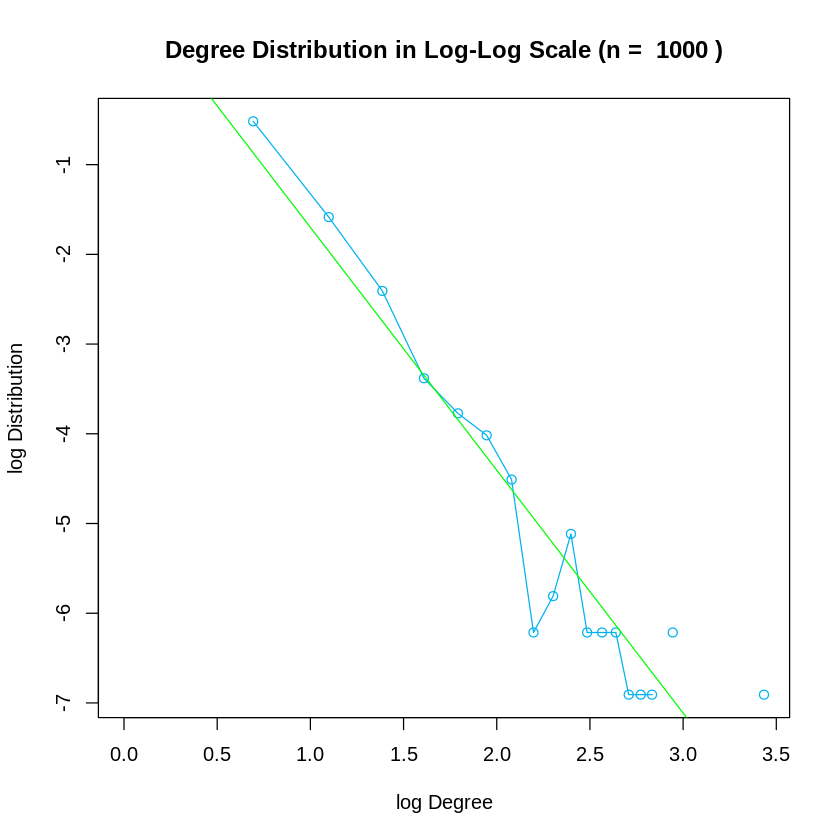


Call:
lm(formula = log_distribution ~ degree)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03612 -0.24750  0.01922  0.23840  1.52260 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.4231     0.2967   4.796 3.59e-05 ***
degree       -3.0199     0.1035 -29.174  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4736 on 32 degrees of freedom
  (22 observations deleted due to missingness)
Multiple R-squared:  0.9638,	Adjusted R-squared:  0.9626 
F-statistic: 851.1 on 1 and 32 DF,  p-value: < 2.2e-16


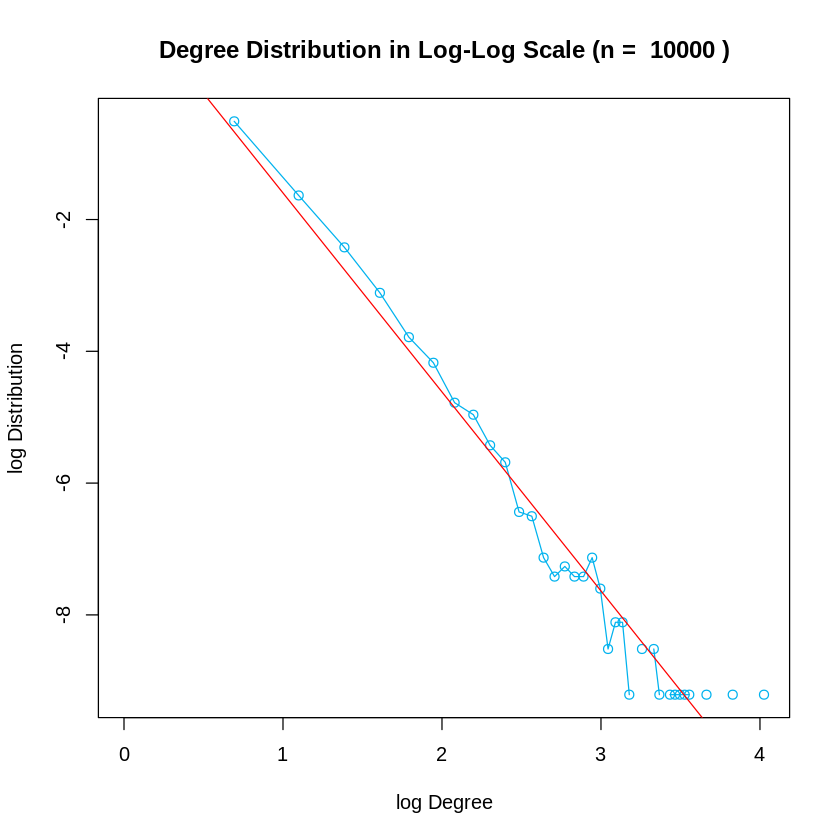

In [0]:
degree <- log(c(1:length(degree.distribution(gra))))
log_distribution <- log(degree.distribution(gra))
plot(degree, log_distribution, type="o", col="deepskyblue2", main=paste("Degree Distribution in Log-Log Scale (n = ",1000,")",collapse=""),xlab="log Degree",ylab="log Distribution")
log_distribution[which(log_distribution==-Inf)] = NA
mod = lm(log_distribution~degree)
summary(mod)
par(xpd=FALSE)
abline(mod, col="green")

degree <- log(c(1:length(degree.distribution(gra2))))
log_distribution <- log(degree.distribution(gra2))
plot(degree, log_distribution, type="o", col="deepskyblue2", main=paste("Degree Distribution in Log-Log Scale (n = ",10000,")",collapse=""),xlab="log Degree",ylab="log Distribution")
log_distribution[which(log_distribution==-Inf)] = NA
mod = lm(log_distribution~degree)
summary(mod)
par(xpd=FALSE)
abline(mod, col="red")


calculate slope?

# e)

freq
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  30 
188 227 164  84  56  67  63   9  15  31  10  16  17   4   6   4  21  18 


Call:
lm(formula = distri_map ~ deg_map)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1801 -0.6018  0.1761  0.5501  1.2726 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.0568     0.4736  -2.232   0.0403 *  
deg_map      -1.2446     0.2141  -5.813 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7465 on 16 degrees of freedom
Multiple R-squared:  0.6787,	Adjusted R-squared:  0.6586 
F-statistic: 33.79 on 1 and 16 DF,  p-value: 2.643e-05


freq
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1585 2202 1619 1131  717  655  364  379  237  184  116   91   66   44   62   46 
  17   18   19   20   21   22   23   25   27   28   30   31   32   33   34   38 
  60   64   58   17   36   28   11   36   28   14   19    8   16   21   24   14 
  45   55 
  28   20 

[1] 1585 2202 1619 1131  717  655  364  379  237  184  116   91   66   44   62
[16]   46   60   64   58   17   36   28   11   36   28   14   19    8   16   21
[31]   24   14   28   20

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25 27
[26] 28 30 31 32 33 34 38 45 55

ERROR: ignored

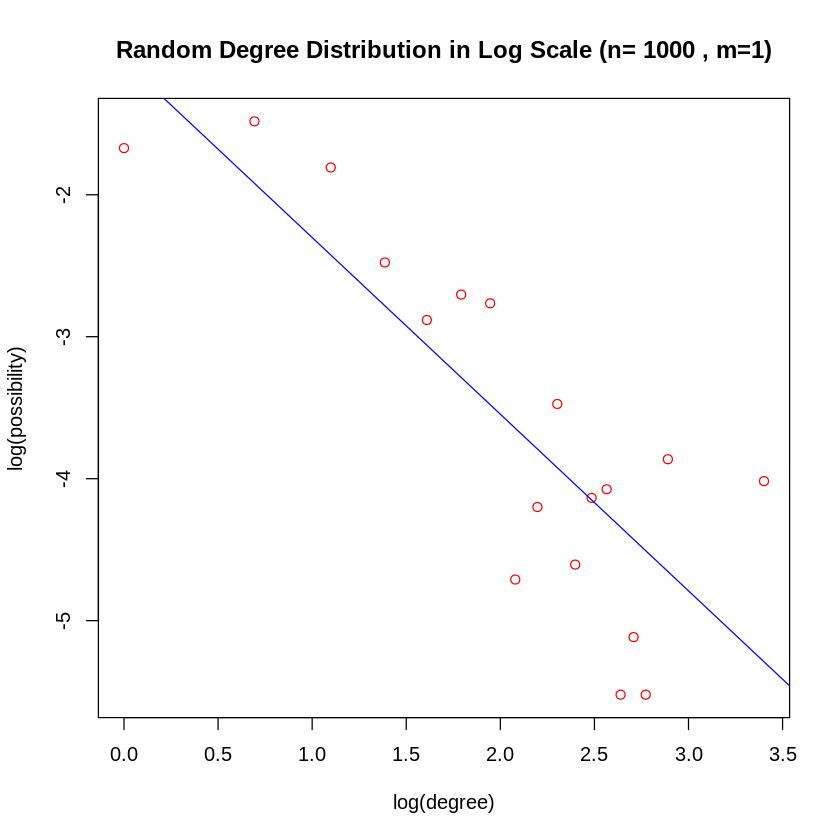

In [0]:
size = array(0, vcount(gra))
for (i in 1:vcount(gra)) {
  pick_n <- sample(vcount(gra), 1)
  total_nei <- neighbors(gra, pick_n, mode="total")
  if (length(total_nei) > 0) {
    one_nei = sample(length(total_nei), 1)
    size[i] <- degree(gra, total_nei[one_nei])
  }
}

freq <- sort(size)
table(freq)
deg_arr = array(0,length(table(freq)))
freq_arr = array(0, length(table(freq)))
prev = freq[1]
index = 1
for(i in 2:length(freq)){
  cur = freq[i]
  if(cur != prev && i != length(freq_arr)){
    freq_arr[index] = sum(freq==prev)
    deg_arr[index] = prev
    prev = cur
    index = index + 1
  }
}
freq_arr[index] = sum(freq==cur)
deg_arr[index] = cur

deg_map <- log(deg_arr)
distri_map <- log(freq_arr/1000)
plot(deg_map, distri_map, col="red", main=paste("Random Degree Distribution in Log Scale (n=",1000,", m=1)",collapse=""),xlab="log(degree)",ylab="log(possibility)")
mod = lm(distri_map~deg_map)
summary(mod)
par(xpd=FALSE)
abline(mod, col="blue")

#n = 10000
size = array(0, vcount(gra2))
for (i in 1:vcount(gra2)) {
  pick_n <- sample(vcount(gra2), 1)
  total_nei <- neighbors(gra2, pick_n, mode="total")
  if (length(total_nei) > 0) {
    one_nei = sample(length(total_nei), 1)
    size[i] <- degree(gra2, total_nei[one_nei])
  }
}

freq <- sort(size)
table(freq)
deg_arr = array(0,length(table(freq)))
freq_arr = array(0, length(table(freq)))
prev = freq[1]
index = 1
for(i in 2:length(freq)){
  cur = freq[i]
  if(cur != prev && i != length(freq_arr)){
    freq_arr[index] = sum(freq==prev)
    deg_arr[index] = prev
    prev = cur
    index = index + 1
  }
}
freq_arr[index] = sum(freq==cur)
deg_arr[index] = cur

freq_arr
deg_arr

degree <- log(deg_arr)
distri_map <- log(freq_arr/10000)
plot(deg_map, distri_map, col="red", main=paste("Random Degree Distribution in Log Scale (n=10000, m=1)",collapse=""),xlab="log(degree)",ylab="log(possibility)")
mod = lm(distri_map~deg_map)
summary(mod)
par(xpd=FALSE)
abline(mod, col="blue")


#f).

[1] 1998

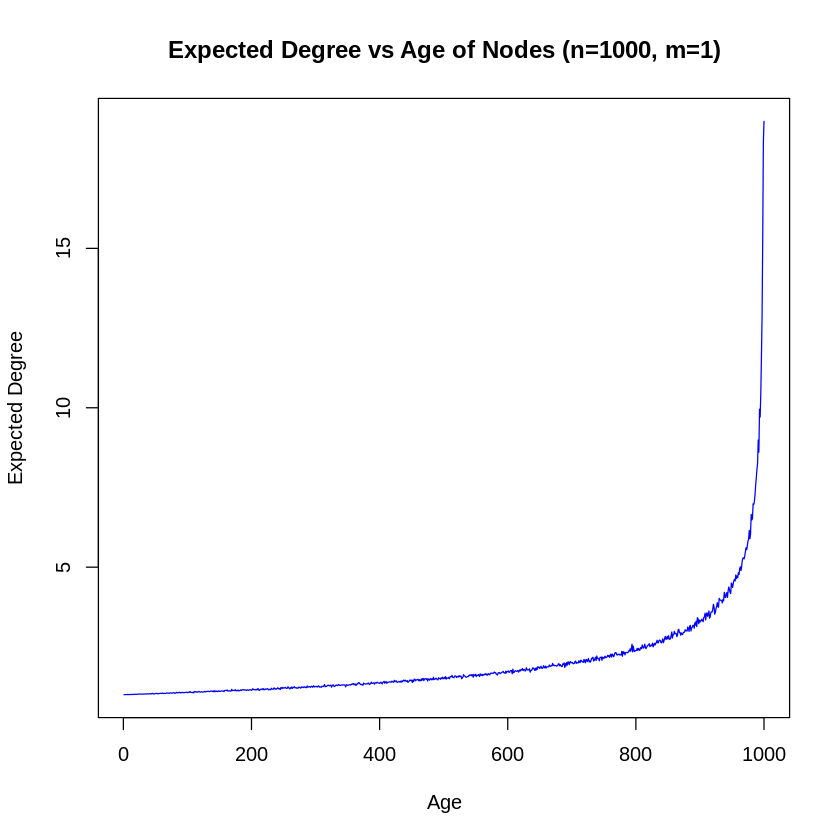

In [0]:
age_arr <- array(0, 1000)
for (i in 1:1000) {
  gra <- barabasi.game(1000,m=1,directed=F)
  age_arr <- age_arr+degree(gra)
}
age_arr <- age_arr/1000
age_x <- array(1:1000)
sum(age_arr)
plot(rev(age_x), age_arr, type="l", col="blue", main="Expected Degree vs Age of Nodes (n=1000, m=1)",xlab="Age",ylab="Expected Degree")


#g).

[1] 100


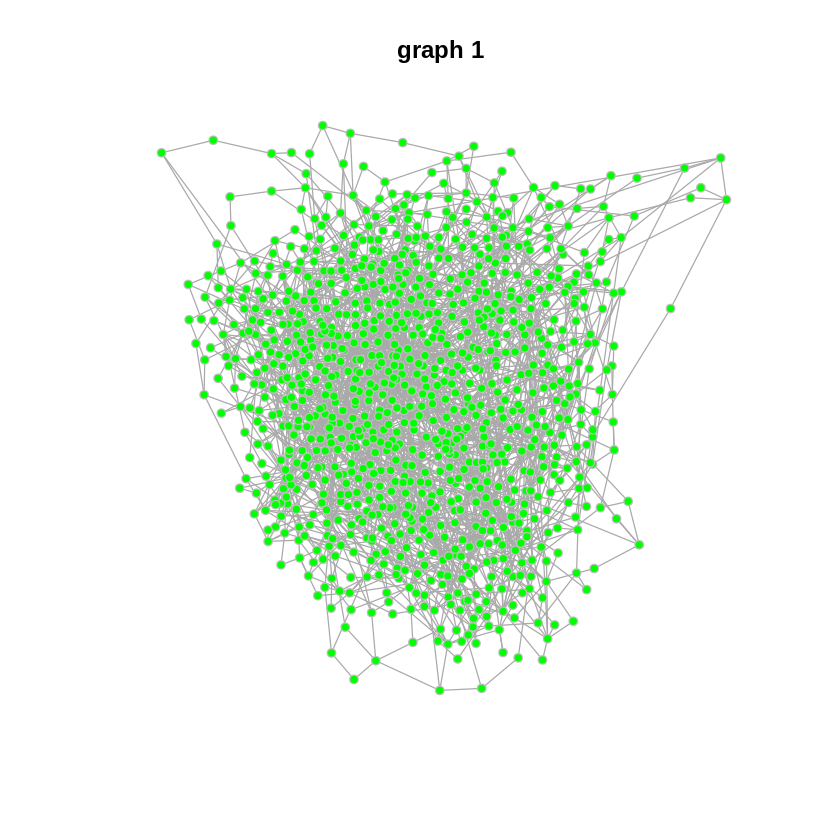

[1] 100


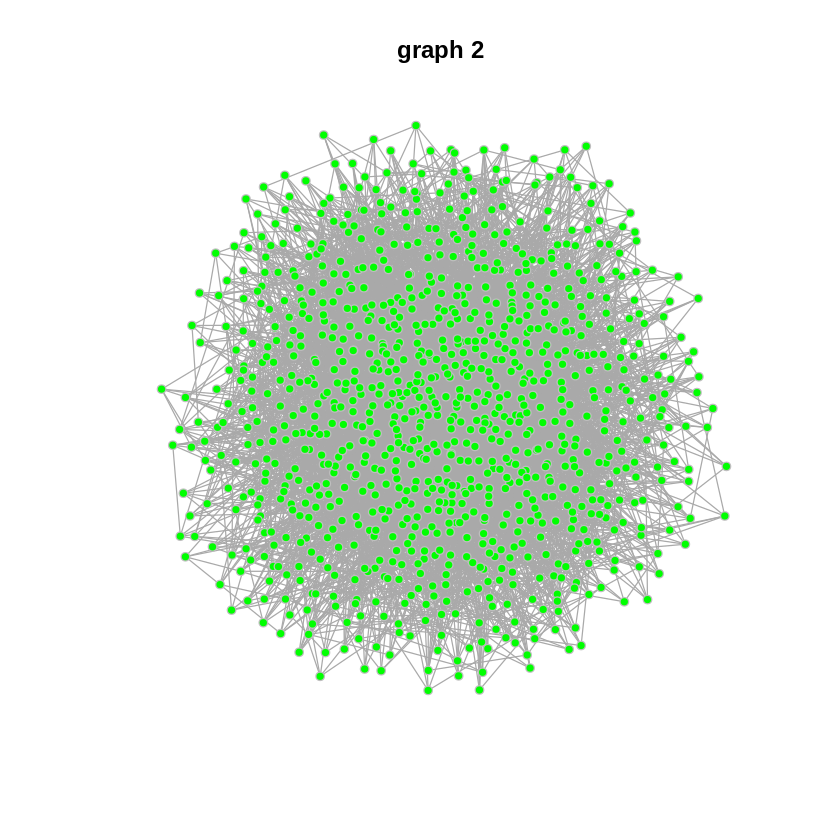

[1] 100


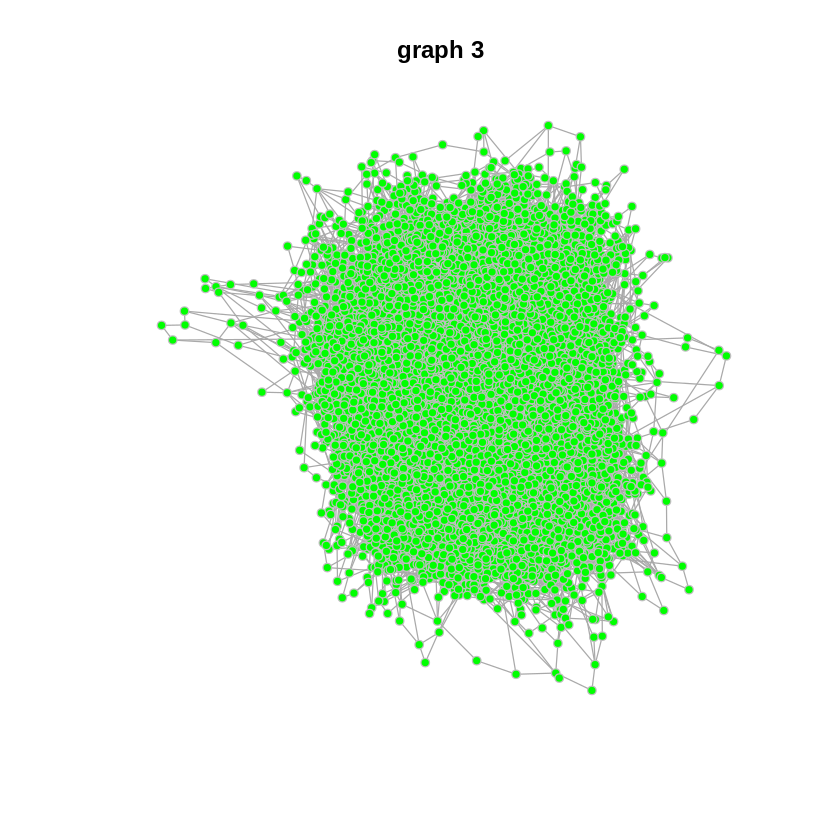

[1] 100
[1] "modularity =  0.527889104563203 "
IGRAPH clustering fast greedy, groups: 17, mod: 0.53
+ groups:
  $`1`
   [1]   6  18  22  32  47  49  68  76 101 103 110 126 139 141 170 173 187 190
  [19] 193 208 214 224 248 276 311 316 329 332 337 356 384 396 403 405 426 470
  [37] 474 475 480 488 506 519 550 552 595 602 622 639 652 655 669 674 691 712
  [55] 753 757 784 791 814 826 831 846 851 859 884 898 902 963 972 978 986
  
  $`2`
   [1]  85  86  90 113 120 140 146 160 192 198 216 225 247 266 270 282 293 325
  [19] 330 354 372 381 385 392 394 432 443 454 468 477 539 541 567 599 604 610
  [37] 611 646 648 676 678 679 683 687 704 715 732 740 745 746 749 765 771 809
  + ... omitted several groups/vertices


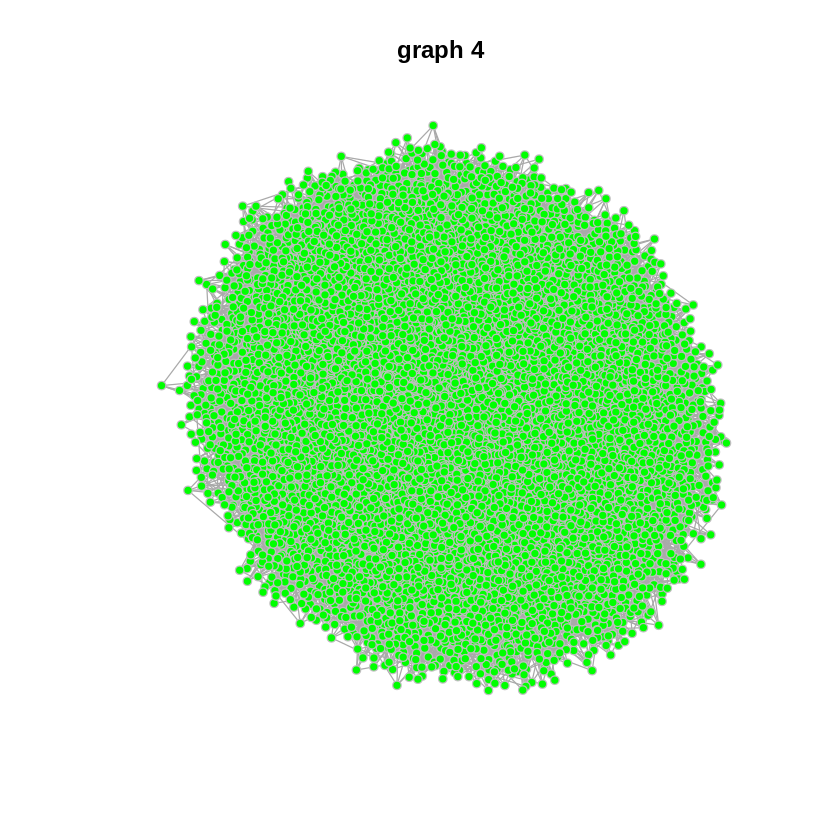

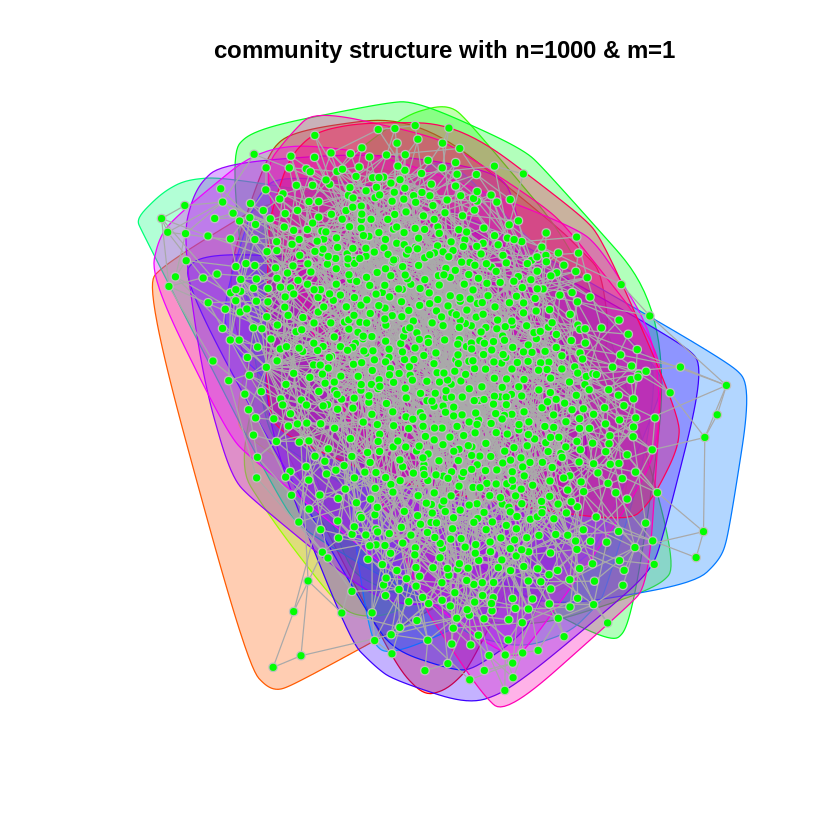


Call:
lm(formula = log_distribution ~ degree)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9521 -0.4336 -0.1275  0.4222  1.7036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7476     0.4763    1.57    0.129    
degree       -2.1677     0.1677  -12.93 1.44e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6719 on 25 degrees of freedom
  (48 observations deleted due to missingness)
Multiple R-squared:  0.8698,	Adjusted R-squared:  0.8646 
F-statistic: 167.1 on 1 and 25 DF,  p-value: 1.438e-12

[1] "modularity =  0.278022573236259 "
IGRAPH clustering fast greedy, groups: 10, mod: 0.28
+ groups:
  $`1`
   [1]  40  96 108 111 122 172 175 215 237 270 285 291 302 312 339 350 383 384
  [19] 393 408 421 425 526 532 545 570 586 596 598 618 632 639 671 676 682 687
  [37] 699 715 721 754 756 783 788 791 798 799 820 821 836 855 876 884 901 908
  [55] 914 962 970 971 992
  
  $`2`
    [1]  16  24 

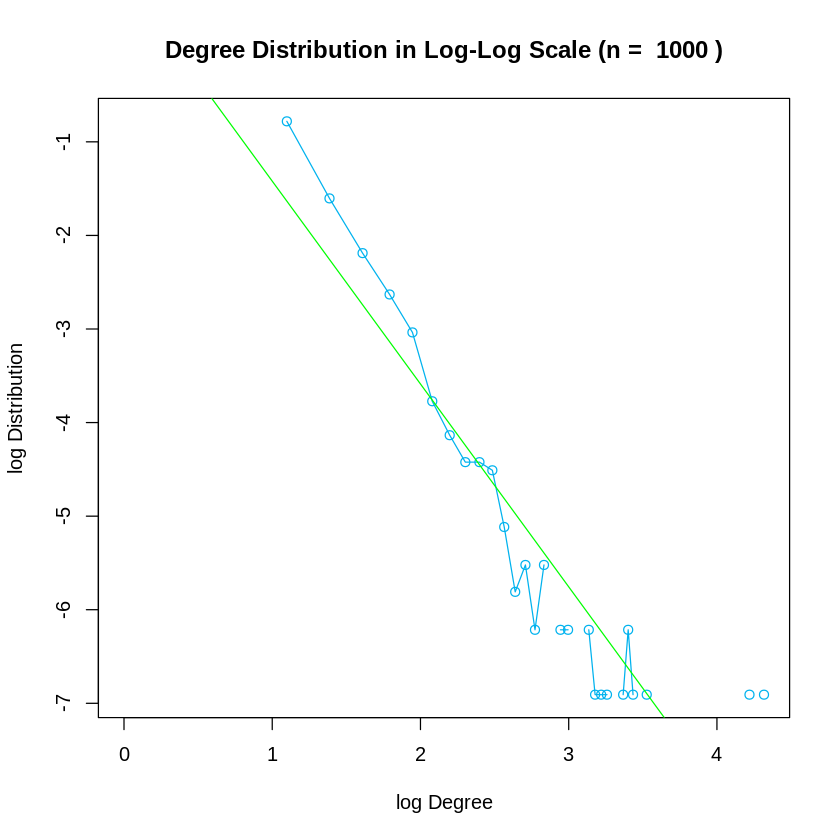

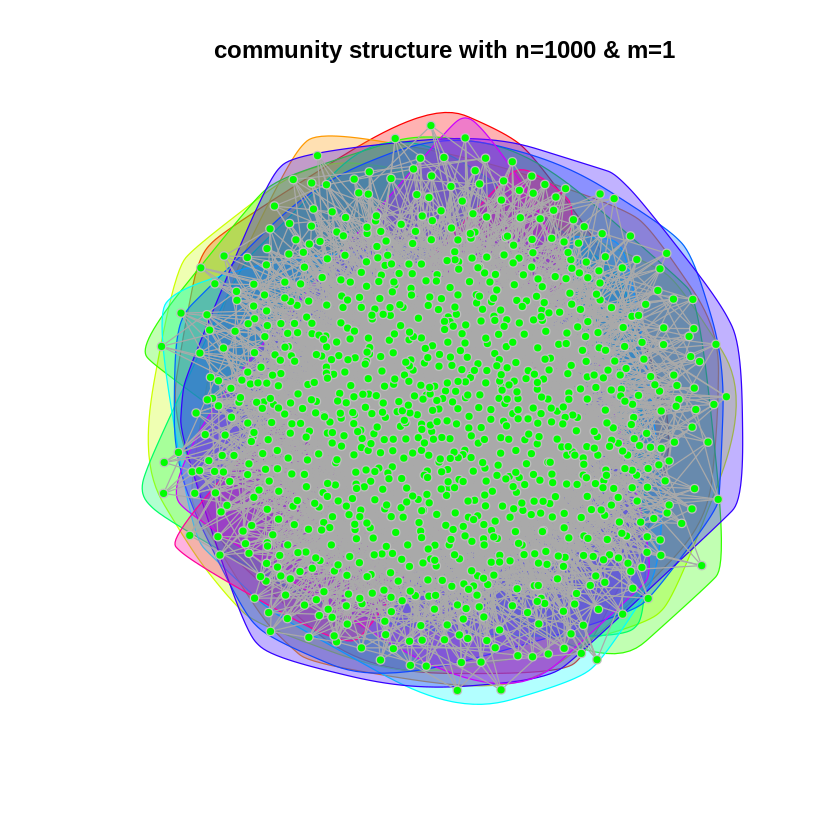


Call:
lm(formula = log_distribution ~ degree)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56659 -0.36654  0.06711  0.27797  1.46149 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1063     0.4015   2.755  0.00844 ** 
degree       -1.9147     0.1161 -16.488  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6025 on 45 degrees of freedom
  (94 observations deleted due to missingness)
Multiple R-squared:  0.858,	Adjusted R-squared:  0.8548 
F-statistic: 271.8 on 1 and 45 DF,  p-value: < 2.2e-16

[1] "modularity =  0.53037301622148 "
IGRAPH clustering fast greedy, groups: 39, mod: 0.53
+ groups:
  $`1`
    [1]  178  195  207  436  447  459  570  578  594  699  734  758  851 1117
   [15] 1201 1206 1309 1316 1329 1335 1352 1394 1507 1544 1552 1573 1654 1684
   [29] 1692 1742 1761 1762 1772 1789 1803 1843 1869 1889 1956 1980 2036 2040
   [43] 2050 2100 2105 2168 2199 2215 2289 2333 

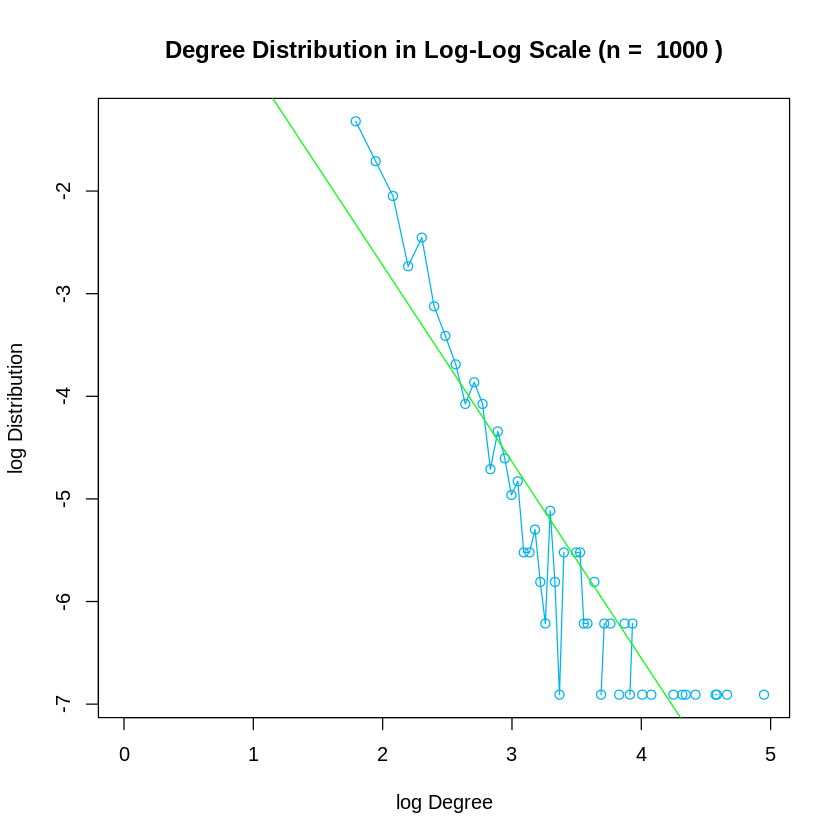

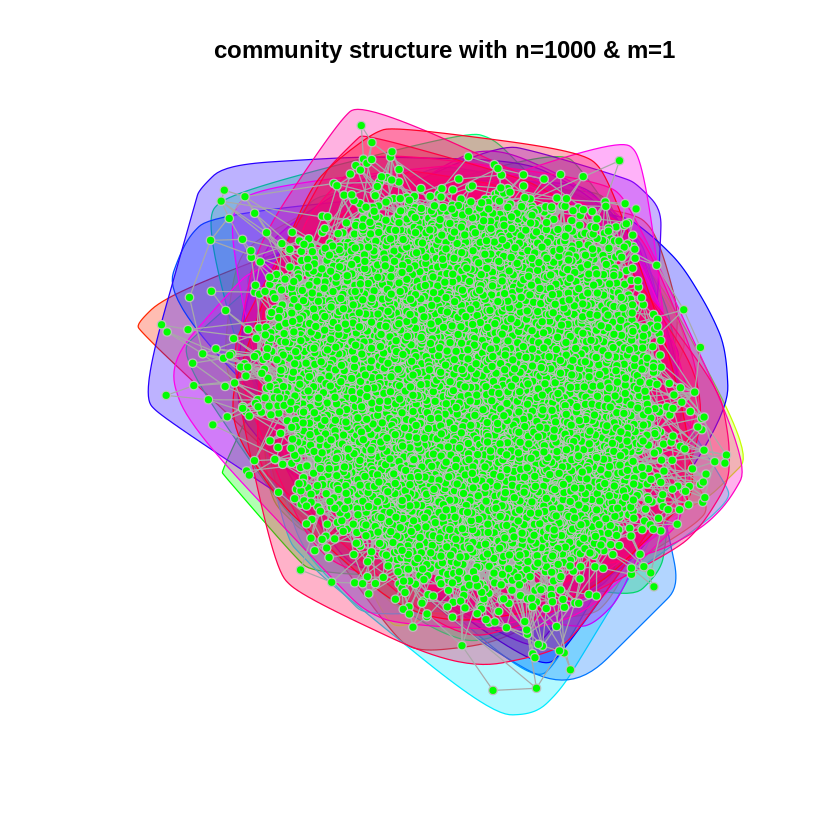


Call:
lm(formula = log_distribution ~ degree)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71605 -0.43101  0.04522  0.43013  1.88500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1318     0.4043   2.799  0.00702 ** 
degree       -2.5120     0.1176 -21.359  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7548 on 56 degrees of freedom
  (72 observations deleted due to missingness)
Multiple R-squared:  0.8907,	Adjusted R-squared:  0.8887 
F-statistic: 456.2 on 1 and 56 DF,  p-value: < 2.2e-16

[1] "modularity =  0.274353203630389 "
IGRAPH clustering fast greedy, groups: 15, mod: 0.27
+ groups:
  $`1`
    [1]  114  119  400  462  542  639  722  738  757  764  855  885  924  982
   [15] 1090 1114 1133 1138 1193 1230 1252 1304 1388 1395 1421 1440 1520 1536
   [29] 1542 1567 1633 1669 1684 1716 1753 1760 1821 1885 1895 1969 1992 2089
   [43] 2095 2103 2135 2168 2177 2184 2202 222

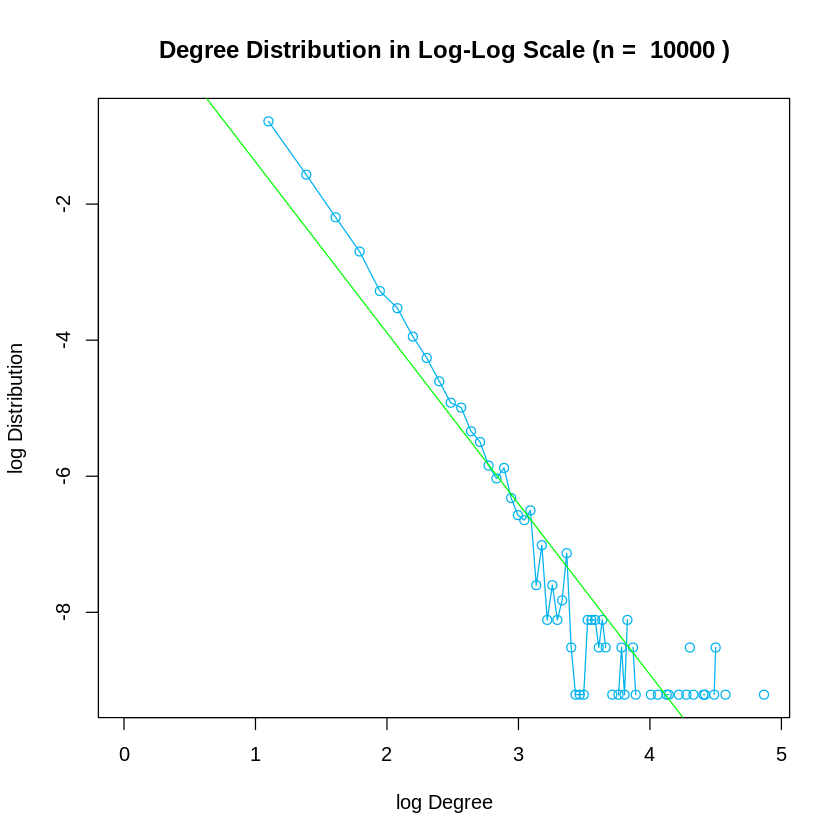

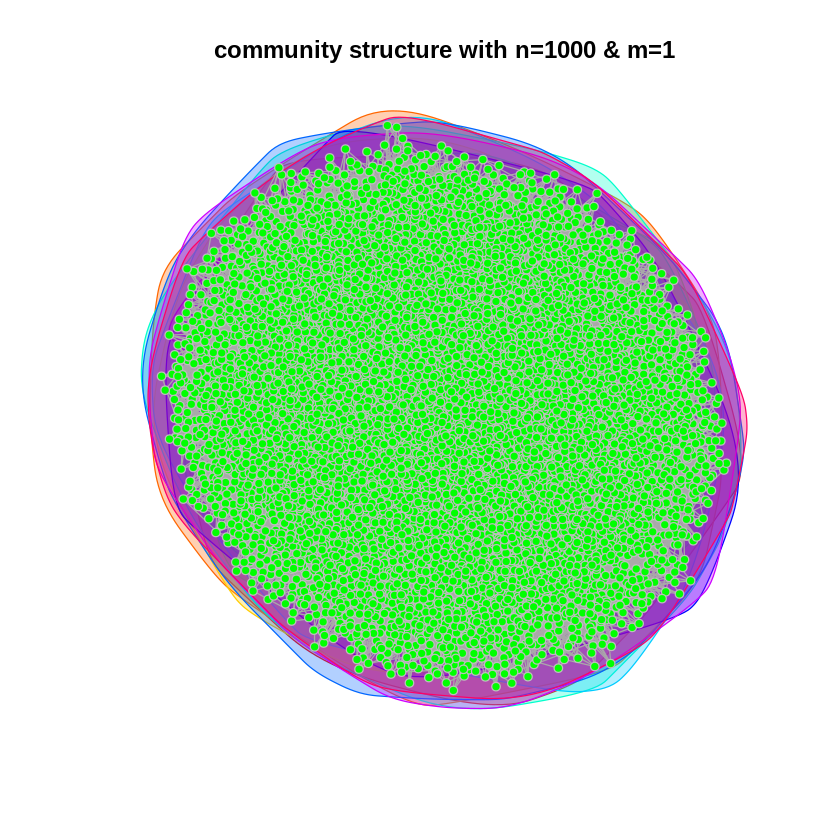


Call:
lm(formula = log_distribution ~ degree)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6783 -0.5032  0.0011  0.4454  2.1522 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.47727    0.35769    4.13 7.26e-05 ***
degree      -2.22835    0.08732  -25.52  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7772 on 106 degrees of freedom
  (210 observations deleted due to missingness)
Multiple R-squared:   0.86,	Adjusted R-squared:  0.8587 
F-statistic: 651.3 on 1 and 106 DF,  p-value: < 2.2e-16



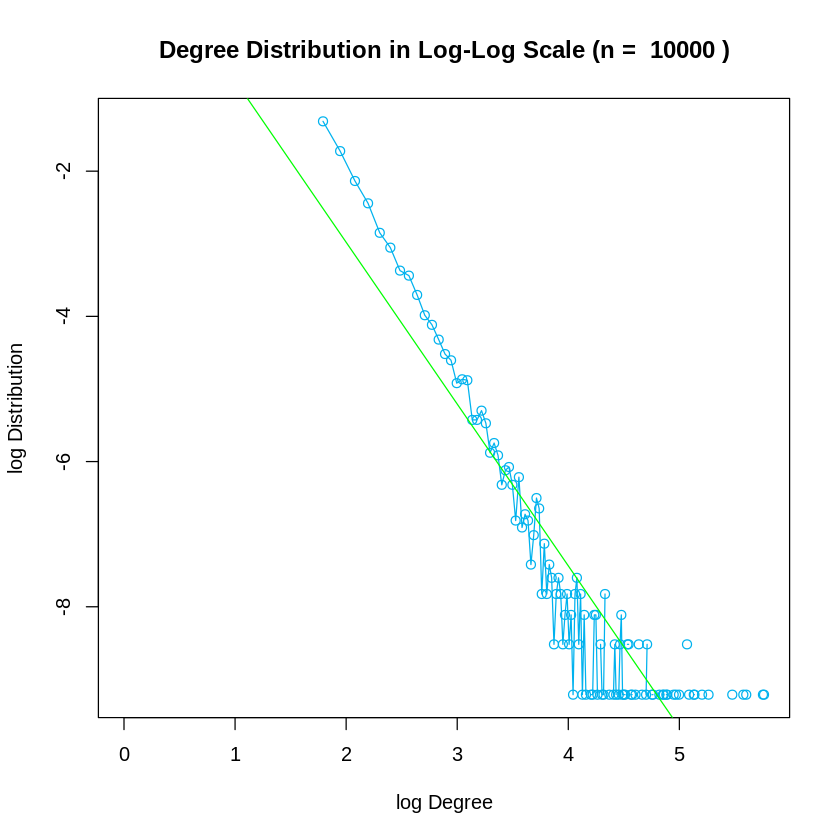


Call:
lm(formula = distri_map ~ deg_map)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3920 -0.3648  0.1166  0.2873  1.3646 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.3054     0.3883  -3.362  0.00249 ** 
deg_map      -0.9604     0.1401  -6.856 3.47e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6186 on 25 degrees of freedom
Multiple R-squared:  0.6528,	Adjusted R-squared:  0.6389 
F-statistic: 47.01 on 1 and 25 DF,  p-value: 3.466e-07



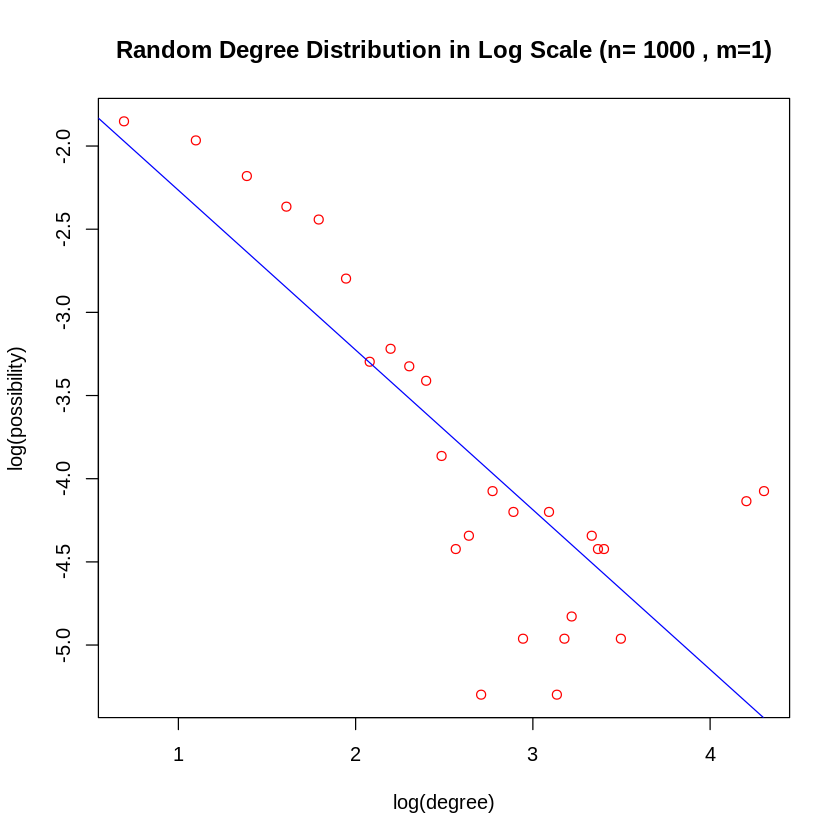


Call:
lm(formula = distri_map ~ deg_map)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03120 -0.22817 -0.02234  0.33881  1.45967 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.7319     0.3866  -4.479 5.09e-05 ***
deg_map      -0.7616     0.1131  -6.736 2.51e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6141 on 45 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.491 
F-statistic: 45.37 on 1 and 45 DF,  p-value: 2.514e-08



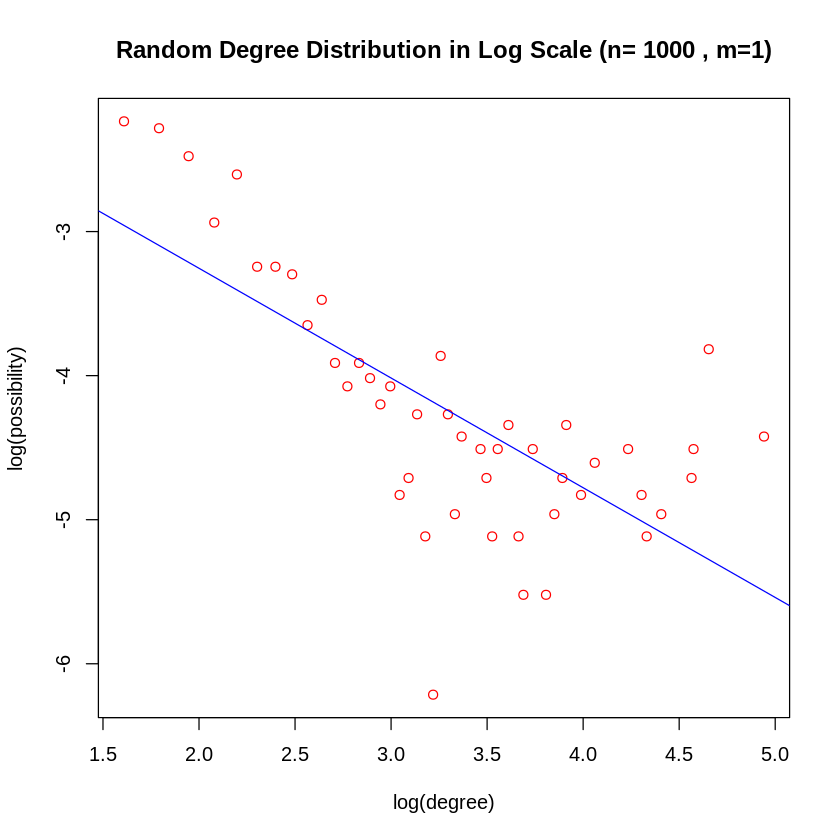


Call:
lm(formula = distri_map ~ deg_map)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85267 -0.45591  0.09705  0.42634  1.88189 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.7569     0.3711   -2.04   0.0461 *  
deg_map      -1.3951     0.1092  -12.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7515 on 56 degrees of freedom
Multiple R-squared:  0.7445,	Adjusted R-squared:   0.74 
F-statistic: 163.2 on 1 and 56 DF,  p-value: < 2.2e-16



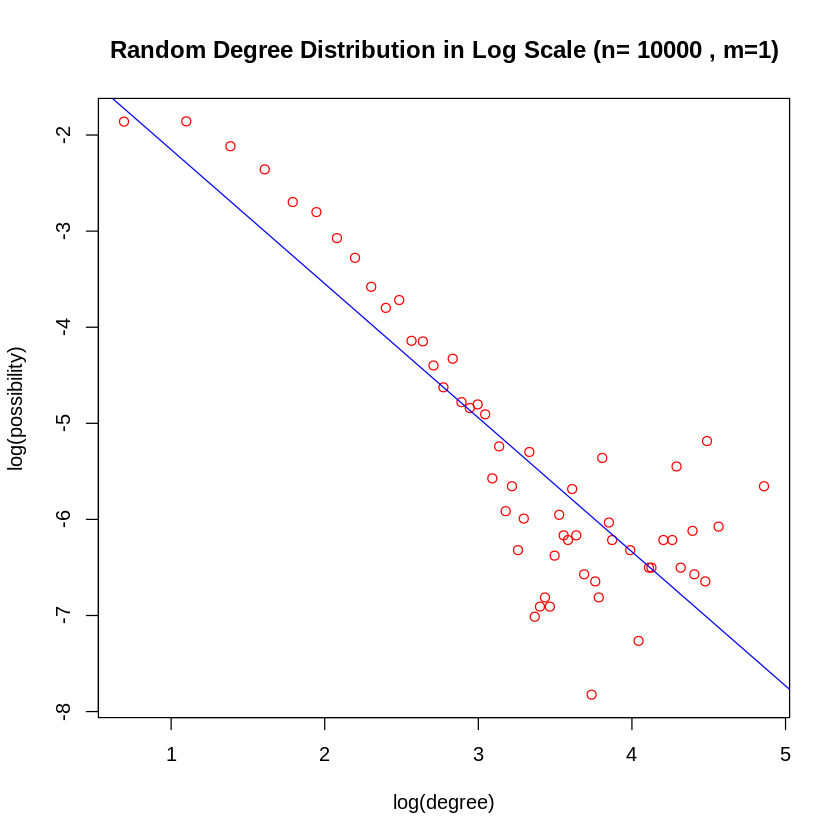


Call:
lm(formula = distri_map ~ deg_map)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.25204 -0.41142  0.08961  0.57132  2.42597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01189    0.38625   -2.62   0.0101 *  
deg_map     -1.20432    0.09479  -12.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8704 on 106 degrees of freedom
Multiple R-squared:  0.6036,	Adjusted R-squared:  0.5999 
F-statistic: 161.4 on 1 and 106 DF,  p-value: < 2.2e-16



[1] 3994

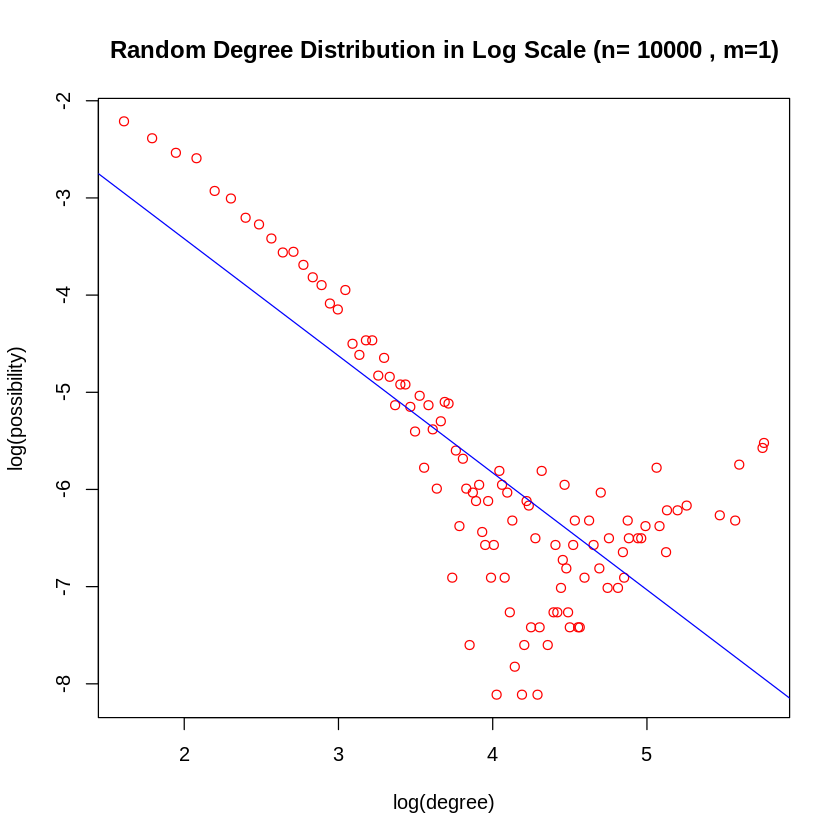

[1] 9970

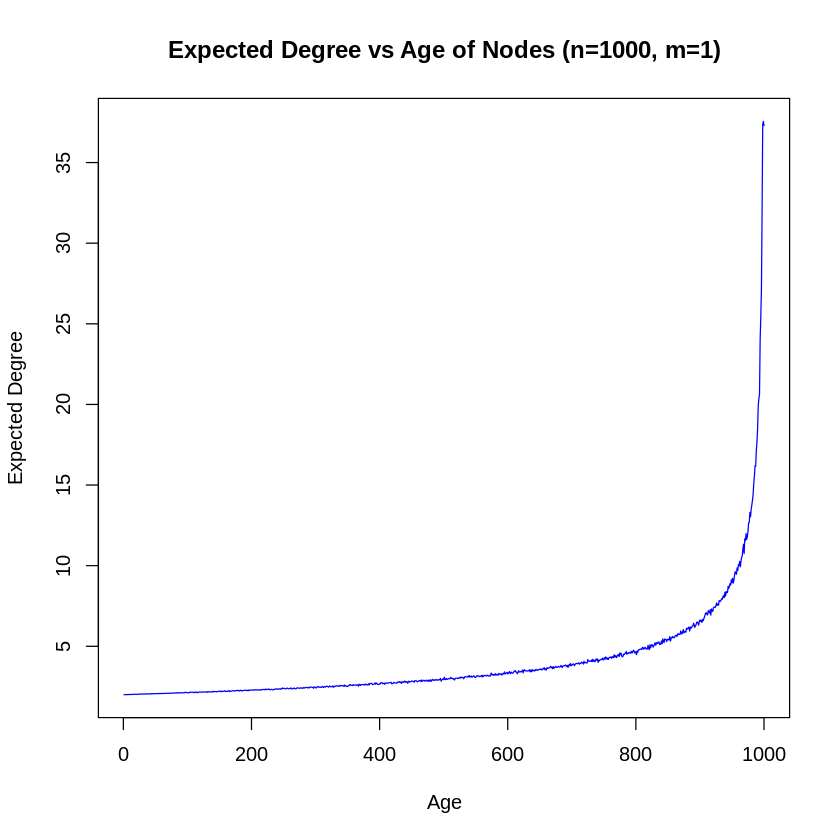

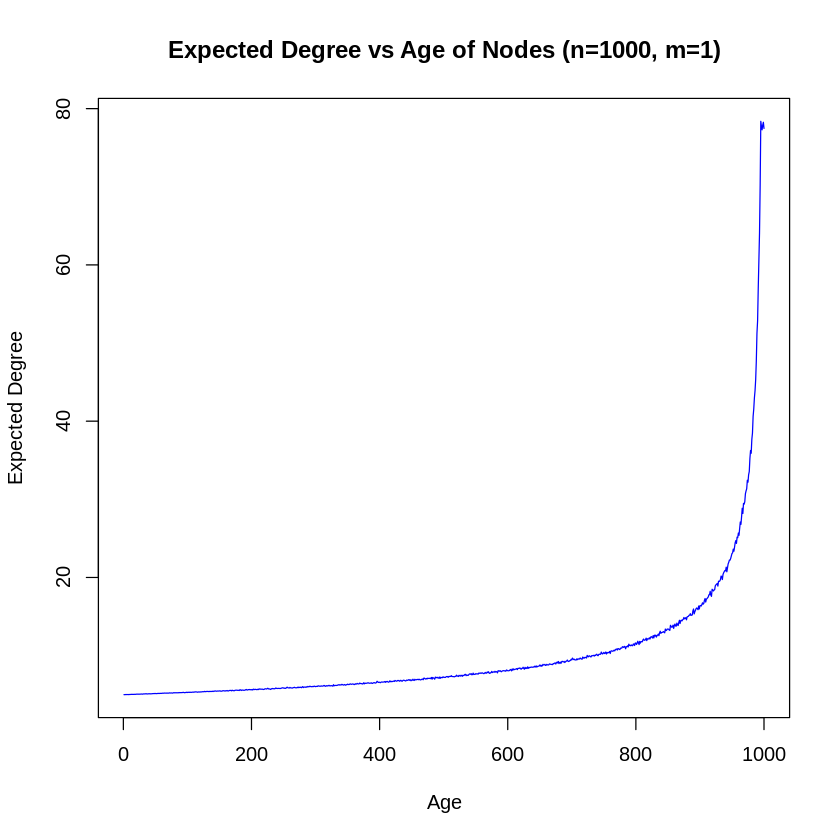

In [0]:
connectivity = function(n, m, index){
  records <- 0
  for (i in 1:100) {
    gra <- barabasi.game(n, m=m, directed=F)
    if (is.connected(gra)) {
      records <- records + 1
    }
  }
  plot(gra, vertex.color="green", edge.arrow.size=1,  vertex.size=3, vertex.label="" ,vertex.frame.color="gray", main = paste("graph",index,"")) 
  print(records)
  
  return(gra)
}

modularity_and_degree = function(n, m, graph){
  com_struc <- cluster_fast_greedy(graph)
  print(paste("modularity = ",modularity(com_struc),""))
  print(com_struc)
  plot(graph, mark.groups=groups(com_struc), edge.arrow.size=1, 
       vertex.color="green", vertex.size=3, vertex.label="", vertex.frame.color="gray",  
       main="community structure with n=1000 & m=1")
  
  degree <- log(c(1:length(degree.distribution(graph))))
  log_distribution <- log(degree.distribution(graph))
  plot(degree, log_distribution, type="o", col="deepskyblue2", main=paste("Degree Distribution in Log-Log Scale (n = ",n,")",collapse=""),xlab="log Degree",ylab="log Distribution")
  log_distribution[which(log_distribution==-Inf)] = NA
  mod = lm(log_distribution~degree)
  print(summary(mod))
  par(xpd=FALSE)
  abline(mod, col="green")
}

degree_distri = function(n, m, graph){
  size = array(0, vcount(graph))
  for (i in 1:vcount(graph)) {
    pick_n <- sample(vcount(graph), 1)
    total_nei <- neighbors(graph, pick_n, mode="total")
    if (length(total_nei) > 0) {
      one_nei = sample(length(total_nei), 1)
      size[i] <- degree(graph, total_nei[one_nei])
    }
  }
  
  freq <- sort(size)
  table(freq)
  deg_arr = array(0,length(table(freq)))
  freq_arr = array(0, length(table(freq)))
  prev = freq[1]
  index = 1
  for(i in 2:length(freq)){
    cur = freq[i]
    if(cur != prev && i != length(freq_arr)){
      freq_arr[index] = sum(freq==prev)
      deg_arr[index] = prev
      prev = cur
      index = index + 1
    }
  }
  freq_arr[index] = sum(freq==cur)
  deg_arr[index] = cur
  
  deg_map <- log(deg_arr)
  distri_map <- log(freq_arr/n)
  plot(deg_map, distri_map, col="red", main=paste("Random Degree Distribution in Log Scale (n=",n,", m=1)",collapse=""),xlab="log(degree)",ylab="log(possibility)")
  mod = lm(distri_map~deg_map)
  print(summary(mod))
  par(xpd=FALSE)
  abline(mod, col="blue")
}

gra1 = connectivity(1000, 2, 1)
gra2 = connectivity(1000, 5, 2)
gra3 = connectivity(10000, 2, 3)
gra4 = connectivity(10000, 5, 4)

modularity_and_degree(1000, 2, gra1)
modularity_and_degree(1000, 5, gra2)
modularity_and_degree(10000, 2, gra3)
modularity_and_degree(10000, 5, gra4)

degree_distri(1000, 2, gra1)
degree_distri(1000, 5, gra2)
degree_distri(10000, 2, gra3)
degree_distri(10000, 5, gra4)

#age_degree m = 2, 5
age_arr <- array(0, 1000)
for (i in 1:1000) {
  gra <- barabasi.game(1000,m=2,directed=F)
  age_arr <- age_arr+degree(gra)
}
age_arr <- age_arr/1000
age_x <- array(1:1000)
sum(age_arr)
plot(rev(age_x), age_arr, type="l", col="blue", main="Expected Degree vs Age of Nodes (n=1000, m=1)",xlab="Age",ylab="Expected Degree")


age_arr <- array(0, 1000)
for (i in 1:1000) {
  gra <- barabasi.game(1000,m=5,directed=F)
  age_arr <- age_arr+degree(gra)
}
age_arr <- age_arr/1000
age_x <- array(1:1000)
sum(age_arr)
plot(rev(age_x), age_arr, type="l", col="blue", main="Expected Degree vs Age of Nodes (n=1000, m=1)",xlab="Age",ylab="Expected Degree")



# h)

[1] "Preferential Attachment network: "
[1] "Modularity  0.933942951960973"
[1] "Stub-Matching Network (simple.no.multiple): "
[1] "Modularity  0.844237130022918"


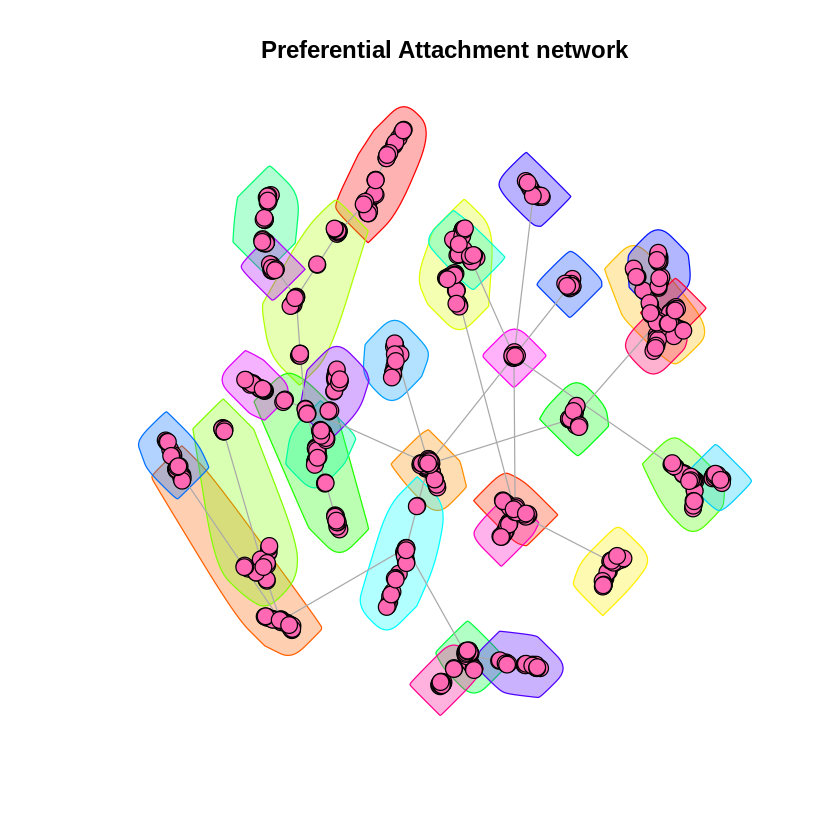

[1] "Stub-Matching Network (vl): "
[1] "Modularity  0.934340747153561"


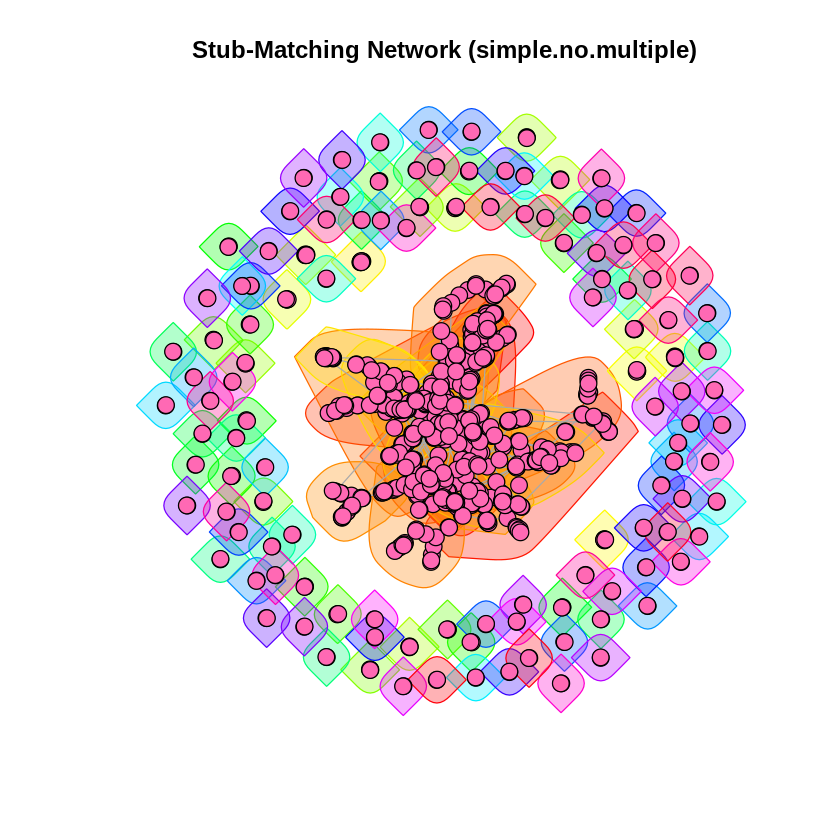

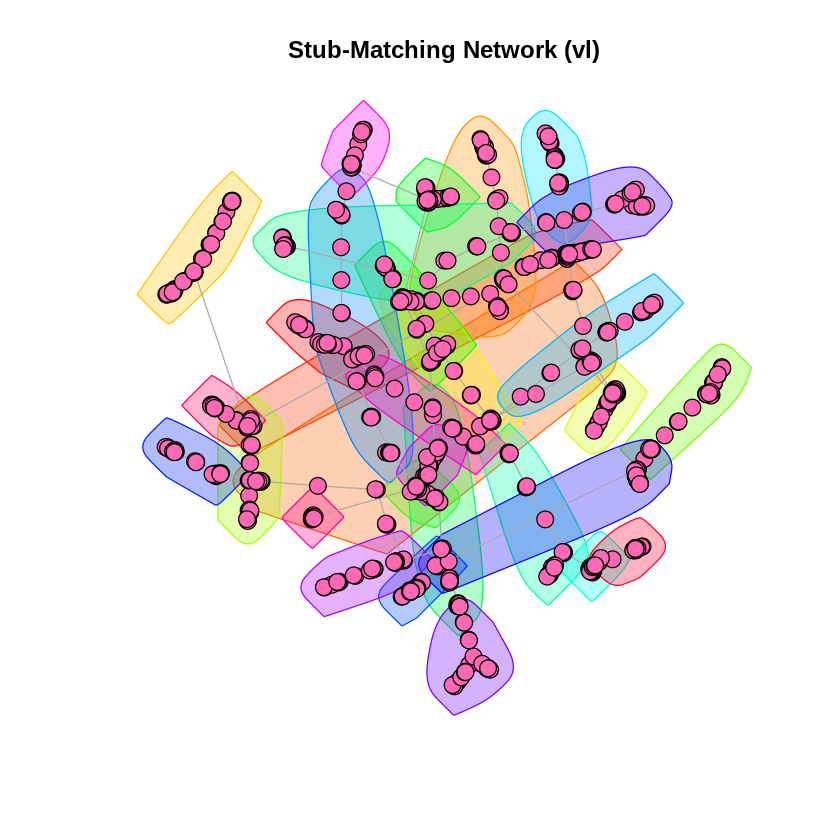

In [0]:
n = 1000
m = 1
g1 = barabasi.game(n=n, m=m, directed=FALSE)
degrees_1 = degree(g1)
communities_1 = cluster_fast_greedy(g1)
modularity_1 = modularity(communities_1)
print("Preferential Attachment network: ")
print(paste("Modularity ", modularity_1))

plot(g1, mark.groups=groups(communities_1), edge.arrow.size=.5, 
     vertex.color="hotpink", vertex.size=6, vertex.frame.color="black", vertex.label="", 
    main="Preferential Attachment network") 


g2 = sample_degseq(degrees_1, method="simple.no.multiple")
degrees_2 = degree(g2)
communities_2 = cluster_fast_greedy(g2)
modularity_2 = modularity(communities_2)
print("Stub-Matching Network (simple.no.multiple): ")
print(paste("Modularity ", modularity_2))

plot(g2, mark.groups=groups(communities_2), edge.arrow.size=.5, 
     vertex.color="hotpink", vertex.size=6, vertex.frame.color="black", vertex.label="", 
    main="Stub-Matching Network (simple.no.multiple)") 


g3 = sample_degseq(degrees_1, method="vl")
degrees_3 = degree(g3)
communities_3 = cluster_fast_greedy(g3)
modularity_3 = modularity(communities_3)
print("Stub-Matching Network (vl): ")
print(paste("Modularity ", modularity_3))

plot(g3, mark.groups=groups(communities_3), edge.arrow.size=.5, 
     vertex.color="hotpink", vertex.size=6, vertex.frame.color="black", vertex.label="", 
    main="Stub-Matching Network (vl)") 


